In [2]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# load titanic dataset
titanic_url = 'https://raw.github.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(titanic_url)

print(df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

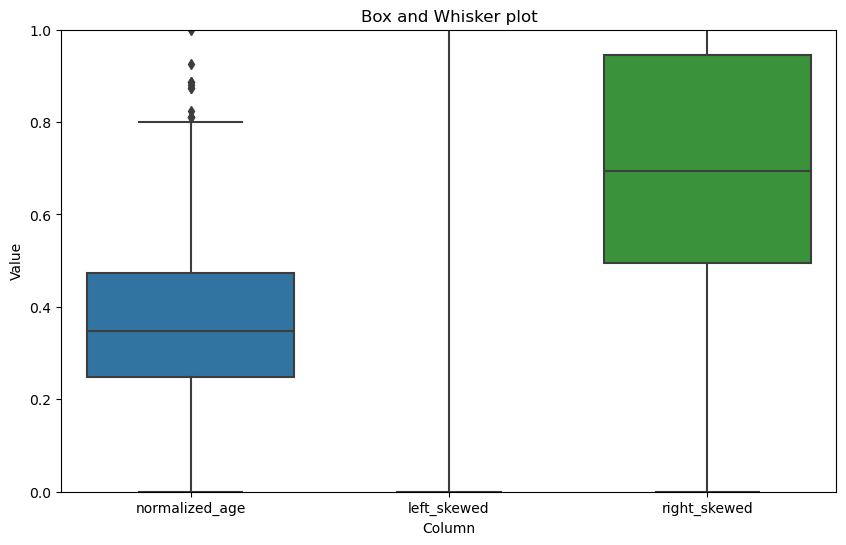

In [4]:
# normalize a column using mix max scalar
## formula = x - x(min) / x(max) - x (min)
def normalize(column):
    return (column - column.min())/(column.max()-column.min())

# lets take Age column and normalize it
df['normalized_age'] = normalize(df['Age'])

# create a left skewed column with outliers
df['left_skewed'] = df['normalized_age']*5 # multiply by a factor less than 1

# create a right skewed column with outliers
df['right_skewed'] = df['normalized_age']*2 # multiply by a factor greater than 1

# plot
plt.figure(figsize=(10, 6))
sns.boxplot(data = df[['normalized_age','left_skewed','right_skewed']])
# set y axis range
plt.ylim(0,1)
plt.xlabel('Column')
plt.ylabel('Value')
plt.title('Box and Whisker plot')
plt.show()

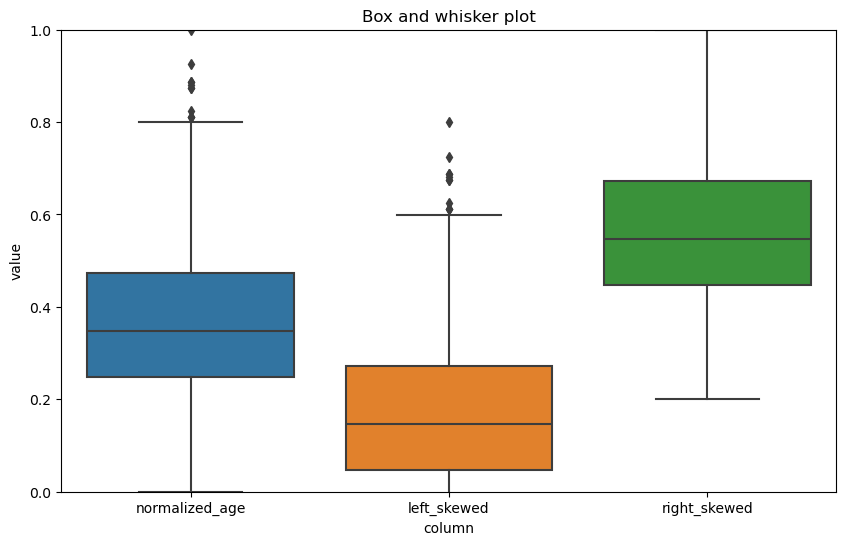

In [8]:
# Example 2 -  Where we will be using addition and subtraction factor
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# load titanic dataset
titanic_url = 'https://raw.github.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(titanic_url)

# print(df.head(5))

# normalize a column using min-max scaler
def normalized(column):
    return (column - column.min())/(column.max()-column.min())

df['normalized_age'] = normalize(df['Age'])

# create a left skewed column with outliers
df['left_skewed'] = df['normalized_age'] - 0.2 # shifting column to left
df.loc[df['left_skewed'] < -0.2, 'left_skewed'] -= 0.5 # add outliers

# create a right skewed column with outliers
df['right_skewed'] = df['normalized_age'] + 0.2 # shifting column to right
df.loc[df['right_skewed'] > 1.2 , 'right_skewed'] += 0.5 # add outliers


# plot
plt.figure(figsize=(10,6))
sns.boxplot(data = df[['normalized_age','left_skewed','right_skewed']])
plt.ylim(0,1) # set y-axis range
plt.xlabel('column')
plt.ylabel('value')
plt.title('Box and whisker plot')
plt.show()

In [11]:
# example 3


# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# load dataset
iris_url = 'https://raw.github.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv'
df = pd.read_csv(iris_url)
print(df)

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


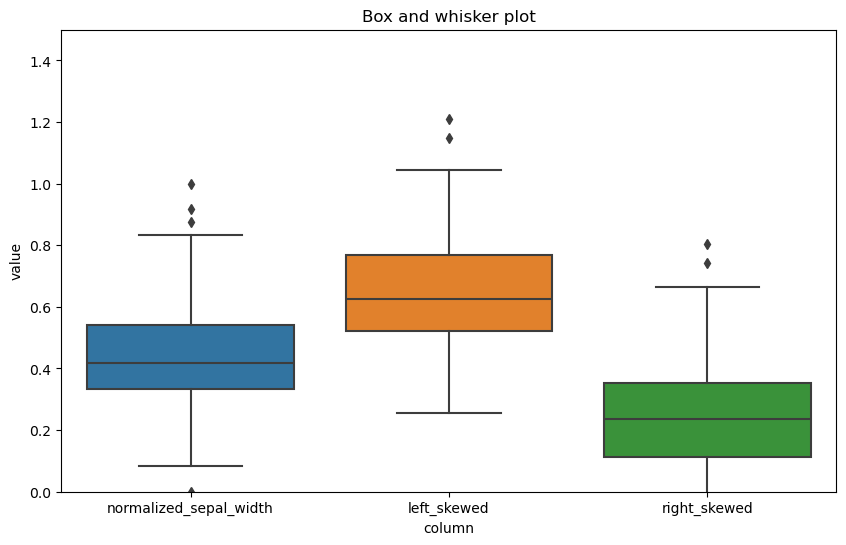

In [12]:
# normalize a colum  usig min max scaling
def normalize(column):
    return (column-column.min())/(column.max()-column.min())

df['normalized_sepal_width'] = normalize(df['sepal_width'])

# create the left skewed column with outliers
left_skewed_data = np.random.normal(loc=-0.2, scale=0.05, size=len(df))
df['left_skewed'] = df['normalized_sepal_width'] - left_skewed_data

# create right skewed column with outliers
right_skewed_data = np.random.normal(loc=0.2, scale=0.05, size = len(df))
df['right_skewed'] = df['normalized_sepal_width'] - right_skewed_data

# plot
plt.figure(figsize=(10, 6))
sns.boxplot(data= df[['normalized_sepal_width', 'left_skewed','right_skewed']])
plt.ylim(0,1.5) # set y-axis range
plt.xlabel('column')
plt.ylabel('value')
plt.title('Box and whisker plot')
plt.show()